# Fotoşopu Bulma

> [Kaynak](https://github.com/PeterWang512/FALdetector/tree/master)

/content/FALdetector
--2019-07-11 08:31:51--  https://www.advocate.com/sites/advocate.com/files/2014/09/08/Selfie400X300.jpg
Resolving www.advocate.com (www.advocate.com)... 104.20.129.3, 104.20.128.3
Connecting to www.advocate.com (www.advocate.com)|104.20.129.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123552 (121K) [image/jpeg]
Saving to: ‘/content/FALdetector/examples/modified.jpg’

/content/FALdetecto 100%[===================>] 120.66K  --.-KB/s    in 0.1s    

2019-07-11 08:31:52 (805 KB/s) - ‘/content/FALdetector/examples/modified.jpg’ saved [123552/123552]

Probibility being modified by Photoshop FAL: 64.09%
['Heatmap', 'Warped', 'Cropped']


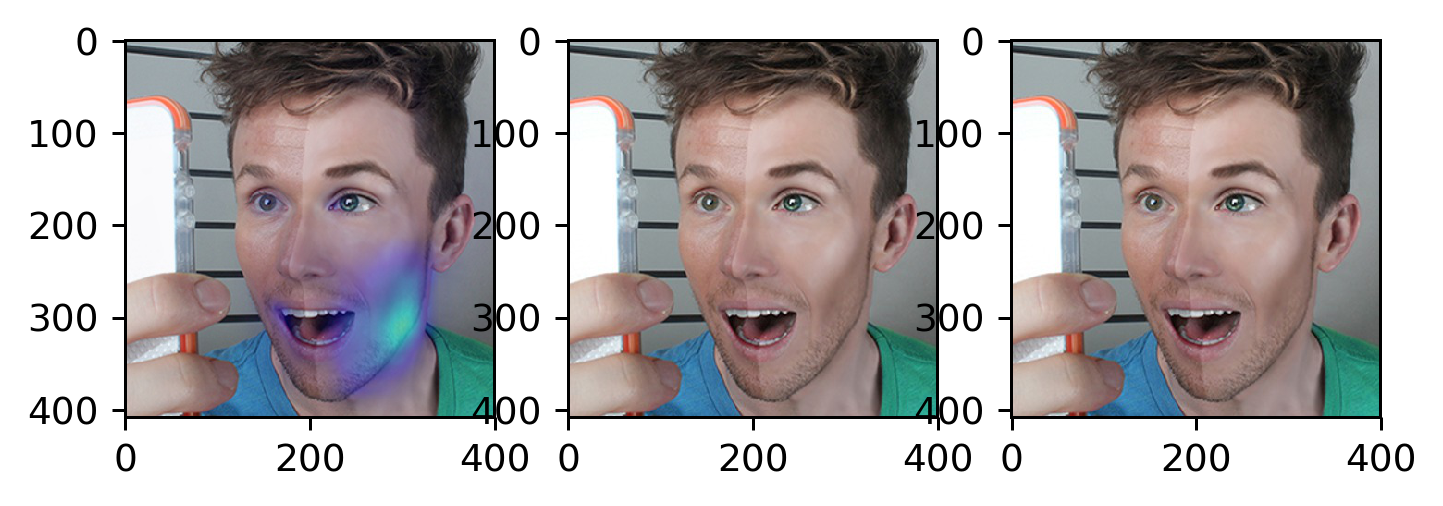

In [38]:
#@title Adobe AI ile Yüzdeki Fotoşopları Bulma { vertical-output: true, display-mode: "form" }

image_path = "https://www.advocate.com/sites/advocate.com/files/2014/09/08/Selfie400X300.jpg" #@param {type:"string"}
from_url = True #@param {type:"boolean"}
fake_probability = True #@param {type:"boolean"}
fake_region = True #@param {type:"boolean"}


if not ("downloaded" in globals() and downloaded):
  %cd /content
  !git clone https://github.com/PeterWang512/FALdetector.git
  %cd FALdetector
  !pip install -r requirements.txt
  !bash weights/download_weights.sh
  downloaded = True
  

def global_classifier(iamge_path):
  !python global_classifier.py --input_path {image_path} --model_path weights/global.pth
  
def local_detector(image_path):
  !mkdir out &> /dev/null
  !python local_detector.py --input_path {image_path} --model_path weights/local.pth --dest_folder out/


if downloaded:
  import threading
  threads = []
  
  %cd "/content/FALdetector"
  if from_url:
    image_url = image_path
    image_path = "/content/FALdetector/examples/modified.jpg"
    !wget -O {image_path} {image_url}
  
  if fake_probability:
    thread = threading.Thread(target=global_classifier, args=[image_path])
    threads.append(thread)
    thread.start()
    
  
  if fake_region:
    thread = threading.Thread(target=local_detector, args=[image_path])
    threads.append(thread)
    thread.start()
    
  for thread in threads:
    thread.join()
  
  import os.path as osp

  imgs = [
      "/content/FALdetector/out/heatmap.jpg",
      "/content/FALdetector/out/warped.jpg",
      "/content/FALdetector/out/cropped_input.jpg"
  ]
  
  titles = [
      "Heatmap",
      "Warped",
      "Cropped"
  ]
  
  show_result = True
  for img in imgs:
    if not osp.isfile(img):
      show_result = False
      break
      
  if show_result:
    import matplotlib.pyplot as plt
    from matplotlib import pyplot as plt
    from PIL import Image
    import math
  
    row = math.ceil(len(imgs) / 3) 
    col = 3
    fig, ax = plt.subplots(dpi=270, nrows=row, ncols=col)

    i = 0
    for col in ax:
        col.imshow(Image.open(imgs[i]))
        i = i+1
        if i == len(imgs):
          break

    print(titles)
    plt.show()
